In [ ]:
#Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

Variables (Colonnes) :

50 Colonnes de Gènes : Chaque colonne représente le niveau d'expression d'un gène spécifique (par exemple, NAT1, BIRC5, BAG1, etc.). Ces niveaux d'expression sont mesurés pour chaque échantillon.

1 Colonne de Sous-Type Moléculaire (pam50) : Cette colonne contient le sous-type moléculaire du cancer du sein pour chaque échantillon.

Observations (Lignes) :

1016 Échantillons : Chaque ligne représente un échantillon de cancer du sein, avec les niveaux d'expression des 50 gènes et le sous-type moléculaire correspondant.

Le sous-type moléculaire est une classification du cancer du sein basée sur l'expression des gènes. Quatre sous-types sont présents dans ce dataset :

Luminal-A : Généralement associé à un bon pronostic. Ce sous-type est souvent sensible aux thérapies hormonales.

Luminal-B : Aussi sensible aux thérapies hormonales, mais avec un pronostic légèrement moins favorable que Luminal-A.

HER2-Enriched : Caractérisé par une surexpression du gène HER2. Ce sous-type peut être traité avec des thérapies ciblant HER2.

Basal-Like : Souvent associé à un pronostic sombre. Ce sous-type est généralement triple négatif (absence de récepteurs hormonaux et de surexpression de HER2).

In [ ]:
import pandas as pd

df = pd.read_csv('breast_cancer_dataset.csv', sep=';', index_col='id_sample')

df.head()

,NAT1,BIRC5,BAG1,BCL2,BLVRA,CCNB1,CCNE1,CDC6,CDC20,CDH3,...,GPR160,UBE2T,CXXC5,ANLN,CEP55,ACTR3B,MLPH,NUF2,TMEM45B,pam50
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01A,7.100449,3.361004,3.972581,4.145669,4.765233,4.788987,2.164814,2.633598,4.131205,0.133455,...,4.150233,4.106918,5.528618,3.073409,2.669860,1.928460,5.567999,2.536764,0.213597,luminal-A
TCGA-3C-AALI-01A,3.453640,4.501040,2.720929,1.493020,5.823480,5.281003,2.535437,2.734157,4.176553,0.110023,...,5.561226,5.648057,4.711309,3.881110,3.357553,1.168684,7.064176,3.124620,3.946538,HER2-enriched
TCGA-3C-AALJ-01A,4.455574,4.164643,3.911511,4.191457,5.987255,5.229446,2.267963,3.379961,4.592752,0.236786,...,2.859309,5.213461,6.152875,2.697093,2.599436,1.177678,5.222420,3.053335,0.281303,luminal-B
TCGA-3C-AALK-01A,4.297961,3.920234,3.688335,3.894904,5.211594,4.014641,0.951107,1.472950,3.806552,0.062392,...,3.063807,4.166154,5.612184,2.645664,2.448027,1.026535,6.225590,1.717959,3.289543,luminal-A
TCGA-4H-AAAK-01A,1.695378,2.950846,4.110014,3.572843,4.317856,3.772768,1.103958,2.338953,3.473484,0.098773,...,3.289418,3.437585,4.299617,2.068516,2.152652,1.513181,5.485277,1.537125,2.976903,luminal-A


In [ ]:
print("\nRésumé général du dataset :")
print(df.info())  # Donne des informations sur les colonnes, types de données, valeurs non nulles


Résumé général du dataset :
<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, TCGA-3C-AAAU-01A to TCGA-Z7-A8R6-01A
Data columns (total 51 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NAT1     1016 non-null   float64
 1   BIRC5    1016 non-null   float64
 2   BAG1     1016 non-null   float64
 3   BCL2     1016 non-null   float64
 4   BLVRA    1016 non-null   float64
 5   CCNB1    1016 non-null   float64
 6   CCNE1    1016 non-null   float64
 7   CDC6     1016 non-null   float64
 8   CDC20    1016 non-null   float64
 9   CDH3     1016 non-null   float64
 10  CENPF    1016 non-null   float64
 11  EGFR     1016 non-null   float64
 12  ERBB2    1016 non-null   float64
 13  ESR1     1016 non-null   float64
 14  FGFR4    1016 non-null   float64
 15  FOXC1    1016 non-null   float64
 16  GRB7     1016 non-null   float64
 17  FOXA1    1016 non-null   float64
 18  KRT5     1016 non-null   float64
 19  KRT14    1016 non-null   float64
 20  K

In [ ]:
df.shape

(1016, 51)

In [ ]:

print("\nStatistiques descriptives :")
df.describe(include='all')  # Statistiques pour les colonnes numériques et catégoriques


Statistiques descriptives :


,NAT1,BIRC5,BAG1,BCL2,BLVRA,CCNB1,CCNE1,CDC6,CDC20,CDH3,...,GPR160,UBE2T,CXXC5,ANLN,CEP55,ACTR3B,MLPH,NUF2,TMEM45B,pam50
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,...,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,luminal-A
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,543
mean,4.070457,3.378398,3.676347,3.277583,5.143436,4.258240,1.636311,2.369036,3.927500,0.120936,...,3.377400,4.296898,4.673063,2.826453,2.811774,1.527655,4.861416,2.407124,1.927967,NaN
std,2.347730,1.191934,0.804707,1.309491,0.897176,0.888129,1.106030,1.040647,1.275261,0.234791,...,1.118279,1.015713,1.052647,1.090861,1.016689,0.629780,1.868202,0.996625,1.281118,NaN
min,0.025205,0.063454,1.501768,0.241724,1.033460,1.733865,0.288759,0.217914,0.442678,0.000000,...,0.297329,1.677718,0.953014,0.280082,0.202053,0.110563,0.020735,0.340905,0.039909,NaN
25%,1.758044,2.491135,3.139140,2.313194,4.634605,3.637564,0.855984,1.615746,3.032178,0.030193,...,2.891459,3.571889,4.192091,2.048324,2.116354,1.139144,4.445900,1.678280,0.850401,NaN
50%,4.295024,3.368830,3.582002,3.498174,5.227720,4.276040,1.274580,2.285604,3.842855,0.062775,...,3.605519,4.294405,4.884692,2.776840,2.784842,1.391072,5.471839,2.346890,1.839665,NaN
75%,6.078537,4.217406,4.126533,4.274304,5.734873,4.891070,2.057207,2.946508,4.777027,0.126341,...,4.134921,5.051850,5.394807,3.550023,3.511422,1.709365,6.057922,3.088216,2.728150,NaN


In [ ]:
# Description des variables qualitatives
df.describe(include="object")

,pam50
count,1016
unique,4
top,luminal-A
freq,543


In [ ]:
print("\nVérification des valeurs nulles par colonne :")
print(df.isnull().sum())  # Compte les valeurs nulles dans chaque colonne

print("\nColonnes complètement vides :")
colonnes_vides = df.columns[df.isnull().all()]
print(colonnes_vides)


Vérification des valeurs nulles par colonne :
NAT1       0
BIRC5      0
BAG1       0
BCL2       0
BLVRA      0
CCNB1      0
CCNE1      0
CDC6       0
CDC20      0
CDH3       0
CENPF      0
EGFR       0
ERBB2      0
ESR1       0
FGFR4      0
FOXC1      0
GRB7       0
FOXA1      0
KRT5       0
KRT14      0
KRT17      0
MAPT       0
MDM2       0
MKI67      0
MMP11      0
MYBL2      0
MYC        0
PGR        0
RRM2       0
SFRP1      0
TYMS       0
MIA        0
EXO1       0
PTTG1      0
MELK       0
NDC80      0
KIF2C      0
UBE2C      0
ORC6       0
SLC39A6    0
PHGDH      0
GPR160     0
UBE2T      0
CXXC5      0
ANLN       0
CEP55      0
ACTR3B     0
MLPH       0
NUF2       0
TMEM45B    0
pam50      0
dtype: int64

Colonnes complètement vides :
Index([], dtype='object')


In [ ]:
df.duplicated().any()
print("\nNombre de lignes dupliquées :")
print(df.duplicated().sum())  # Compte les lignes dupliquées


Nombre de lignes dupliquées :
0


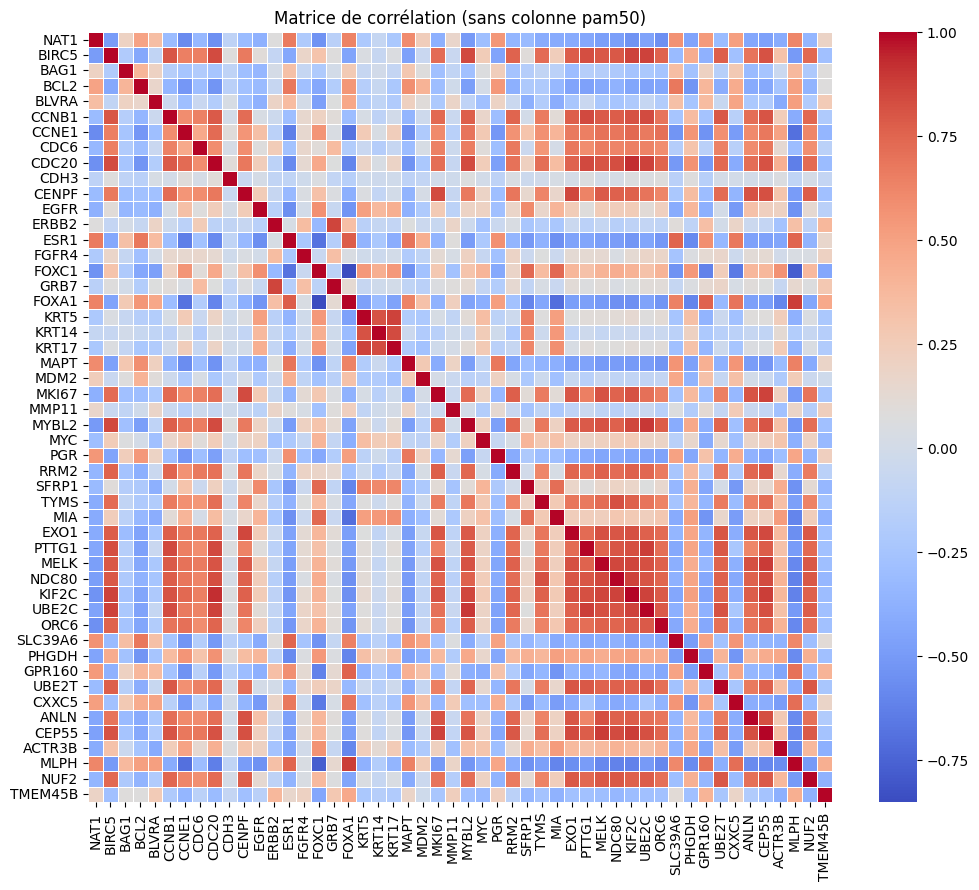

In [ ]:
# Exclusion de la colonne 'pam50' pour la matrice de corrélation
df_cleaned = df.drop(columns=["pam50"])

# Calcul de la matrice de corrélation
correlation_matrix = df_cleaned.corr()



# Visualisation avec une heatmap Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation (sans colonne pam50)')
plt.show()

In [ ]:
print("\nTypes de données uniques dans chaque colonne :")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} valeurs uniques")


Types de données uniques dans chaque colonne :
NAT1: 1016 valeurs uniques
BIRC5: 1016 valeurs uniques
BAG1: 1016 valeurs uniques
BCL2: 1016 valeurs uniques
BLVRA: 1016 valeurs uniques
CCNB1: 1016 valeurs uniques
CCNE1: 1016 valeurs uniques
CDC6: 1016 valeurs uniques
CDC20: 1016 valeurs uniques
CDH3: 999 valeurs uniques
CENPF: 1016 valeurs uniques
EGFR: 1016 valeurs uniques
ERBB2: 1016 valeurs uniques
ESR1: 1016 valeurs uniques
FGFR4: 1016 valeurs uniques
FOXC1: 1016 valeurs uniques
GRB7: 1016 valeurs uniques
FOXA1: 1016 valeurs uniques
KRT5: 1014 valeurs uniques
KRT14: 1010 valeurs uniques
KRT17: 1016 valeurs uniques
MAPT: 1016 valeurs uniques
MDM2: 1015 valeurs uniques
MKI67: 1015 valeurs uniques
MMP11: 1016 valeurs uniques
MYBL2: 1016 valeurs uniques
MYC: 1016 valeurs uniques
PGR: 1016 valeurs uniques
RRM2: 1016 valeurs uniques
SFRP1: 1016 valeurs uniques
TYMS: 1016 valeurs uniques
MIA: 980 valeurs uniques
EXO1: 1016 valeurs uniques
PTTG1: 1016 valeurs uniques
MELK: 1016 valeurs uni

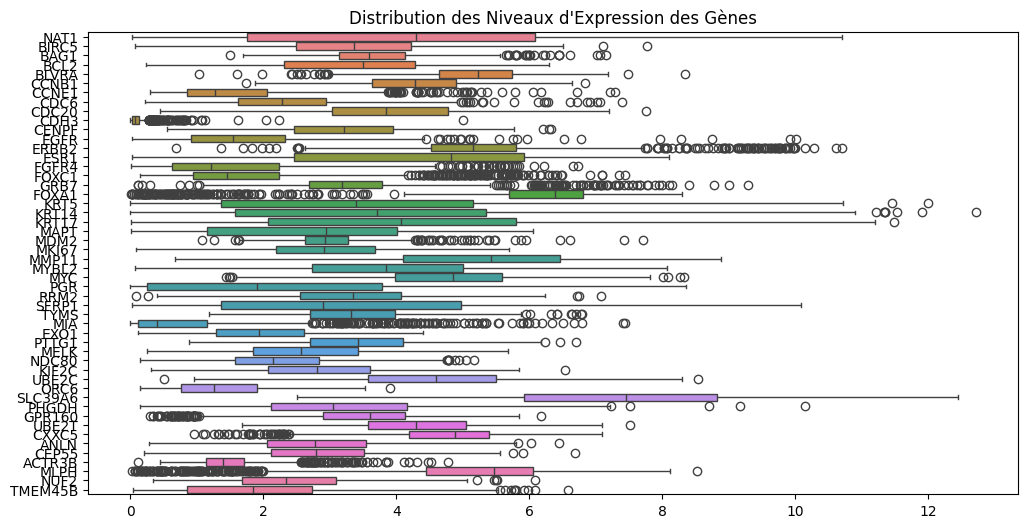

In [ ]:
# Distribution des niveaux d'expression des gènes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, orient='h')
plt.title('Distribution des Niveaux d\'Expression des Gènes')
plt.show()

In [ ]:
df.groupby(['pam50']).size()

,0
pam50,
HER2-enriched,82
basal-like,190
luminal-A,543
luminal-B,201


<Axes: xlabel='pam50'>

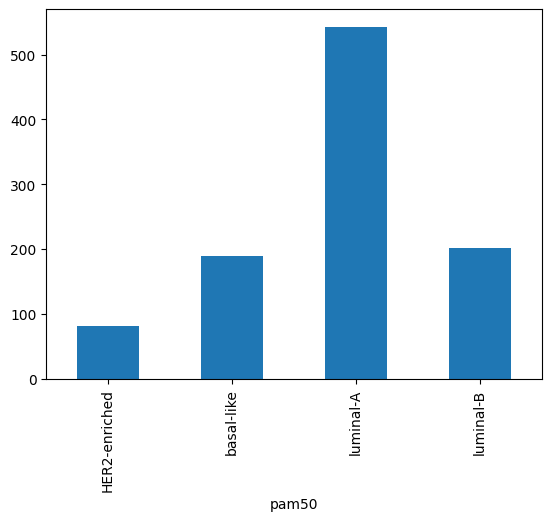

In [ ]:
df.groupby(['pam50']).size().plot(kind = "bar")

In [ ]:
# Données d'expression de 50 gènes
X = df.select_dtypes('number')
print('X', X.shape)

X (1016, 50)


In [ ]:
# Etiquettes correspondantes (sous-types moléculaires)
y = df['pam50']
print('y', y.shape)

y (1016,)


# Analyse en Composantes principales

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # instanciation de l'objet scaler
X_scaled = scaler.fit_transform(X) # normalisation centrée-réduite
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns) # conversion du résultat en objet dataframe de pandas

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA() # instanciation de l'objet pca
X_pca = pca.fit_transform(X_scaled) # réalisation de l'ACP sur les données X_scaled


In [ ]:
# Conversion en dataframe pandas
pca_columns = ['PC' + str(c) for c in range(1, X_pca.shape[1]+1, 1)] # création d'une liste avec les noms de colonnes de PC1 à PC50
X_pca = pd.DataFrame(X_pca, index=X.index, columns=pca_columns) # création du dataframe
X_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01A,-0.826271,-3.433650,-2.510632,-0.738305,-1.069998,0.526869,-0.826776,1.402600,-0.712689,1.873343,...,0.294489,0.239547,0.079559,0.104298,-0.378077,-0.083779,-0.163103,-0.172791,0.028911,0.017975
TCGA-3C-AALI-01A,2.902839,-3.922170,6.698382,1.531670,-0.138620,0.431154,-0.519937,-0.732733,-0.720277,0.500913,...,0.012068,-0.320612,0.340675,-0.188449,-0.423823,-0.002814,-0.493395,-0.676903,-0.099423,0.227992
TCGA-3C-AALJ-01A,0.869263,-3.749200,-0.434459,-0.689772,1.928451,0.534292,0.280851,1.430496,-0.582105,0.381386,...,-0.001786,0.225937,0.140912,0.055719,-0.039554,0.188600,-0.085266,-0.329374,-0.467050,0.271044
TCGA-3C-AALK-01A,-1.765921,0.760450,1.339832,2.331983,0.074528,-0.138779,0.411600,0.352907,0.126035,-0.530383,...,-0.122736,0.214867,0.415538,-0.085572,0.213560,0.346038,0.108832,0.087644,-0.019231,-0.172559
TCGA-4H-AAAK-01A,-2.017120,1.740945,1.163439,1.385725,0.171750,0.465903,2.096529,1.139202,1.572573,0.886130,...,0.084215,-0.077875,0.005870,-0.045677,0.005480,0.185906,-0.033933,0.050316,0.082190,0.107746


In [ ]:
pca.explained_variance_ratio_

array([0.4141211 , 0.1399058 , 0.06153661, 0.04304336, 0.03228112,
       0.02948981, 0.02137533, 0.01932914, 0.01927726, 0.01648891,
       0.01537033, 0.01345515, 0.01179742, 0.01091564, 0.01032152,
       0.00954922, 0.00895897, 0.00852771, 0.00772808, 0.00720844,
       0.00692966, 0.00656934, 0.0064256 , 0.00572167, 0.00549796,
       0.00520188, 0.00488695, 0.004677  , 0.00435519, 0.00405197,
       0.00376135, 0.00360729, 0.00322888, 0.00311163, 0.00295957,
       0.00278843, 0.00275436, 0.0025318 , 0.00243809, 0.00232694,
       0.00216209, 0.00200786, 0.00189123, 0.00173565, 0.00162586,
       0.001574  , 0.00132835, 0.00118083, 0.00108477, 0.00090288])

In [ ]:
explained_variance = pd.Series(dict(zip(X_pca.columns, 100.0*pca.explained_variance_ratio_)))
print(explained_variance.head())

PC1    41.412110
PC2    13.990580
PC3     6.153661
PC4     4.304336
PC5     3.228112
dtype: float64


<Axes: ylabel='Explained variance'>

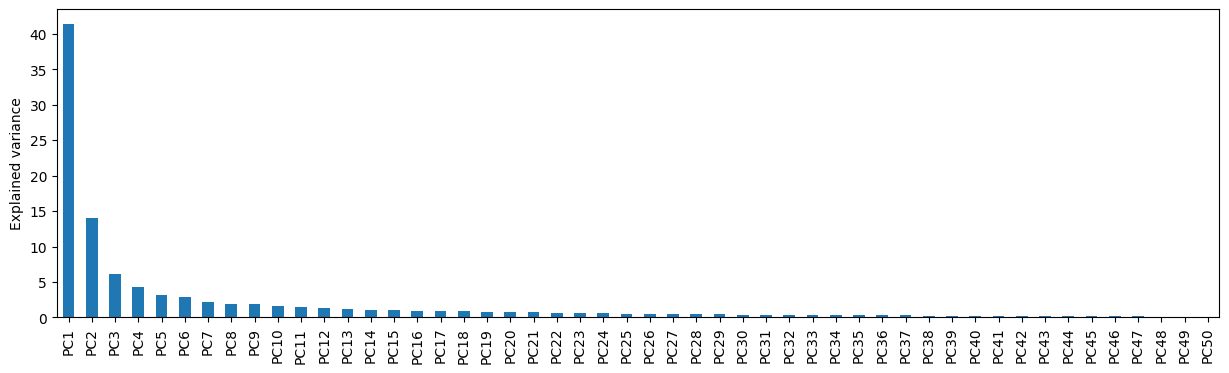

In [ ]:
explained_variance.plot(kind='bar', figsize=(15, 4), rot=90, ylabel='Explained variance')

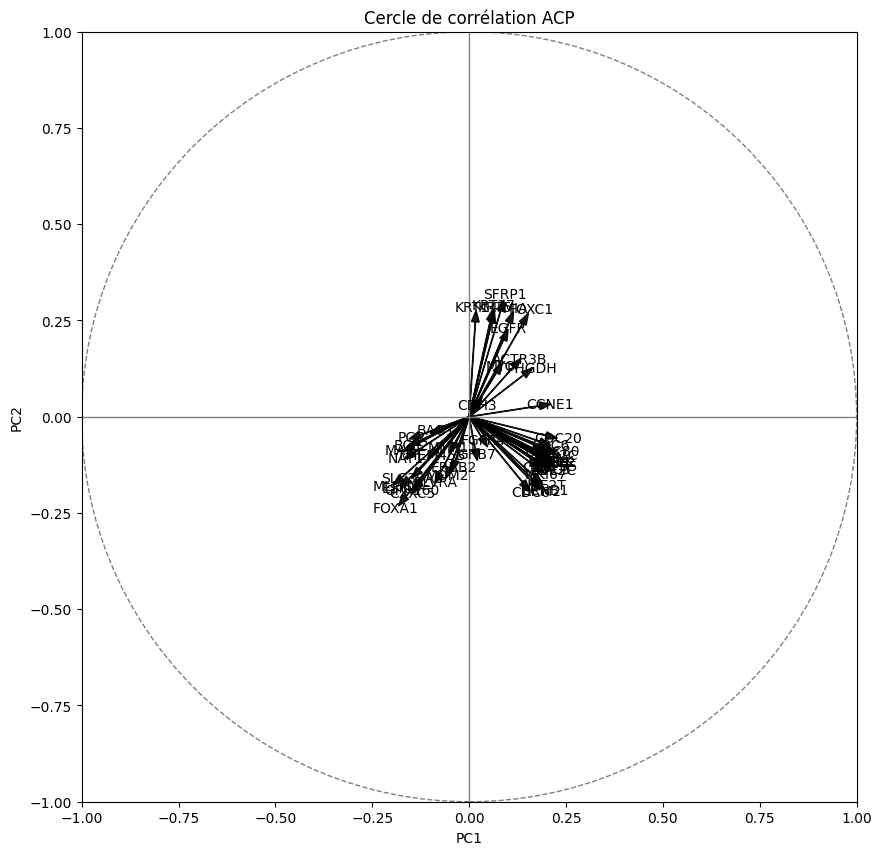

In [ ]:
coeff = np.transpose(pca.components_[0:2, :])  # Transposition pour avoir les variables en lignes
n = coeff.shape[0]  # Nombre de variables

# Créer la figure
plt.figure(figsize=(10, 10))

# Tracer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, df_cleaned.columns[i], color='k', ha='center', va='center')

# Tracer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP')

# Afficher la figure
plt.show()


<Axes: xlabel='PC1', ylabel='PC2'>

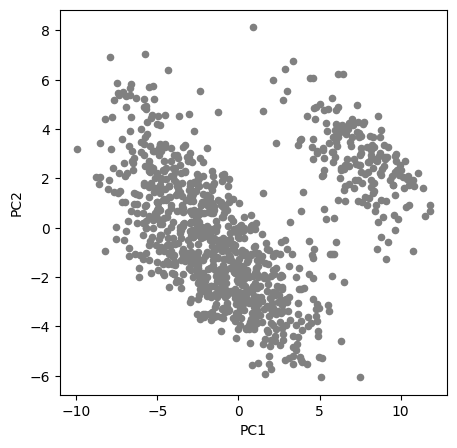

In [ ]:
X_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color='gray')

<Axes: xlabel='PC1', ylabel='PC2'>

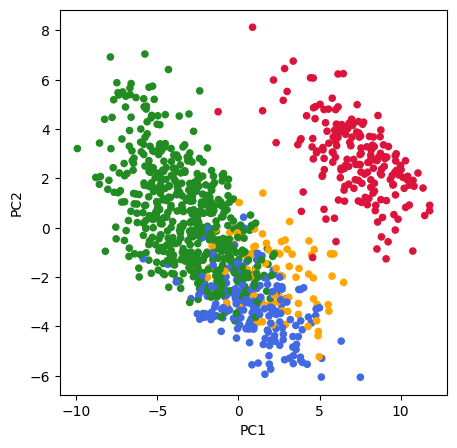

In [ ]:
dict_colors = {'luminal-A': 'forestgreen', 'luminal-B': 'royalblue', 'HER2-enriched': 'orange', 'basal-like': 'crimson'}
y_colors = [dict_colors[yi] for yi in y]
X_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color=y_colors)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

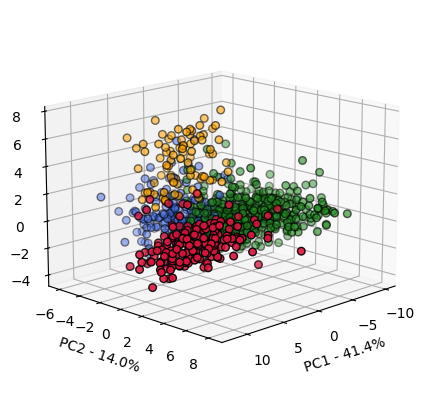

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']))
ax.view_init(elev=15, azim=45)

# Visualiser les données avec la méthode t-SNE


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=columns)
X_tsne.head()

,DIM1,DIM2
id_sample,,
TCGA-3C-AAAU-01A,-0.183046,-18.951719
TCGA-3C-AALI-01A,28.391926,2.739013
TCGA-3C-AALJ-01A,5.756209,-8.250829
TCGA-3C-AALK-01A,-14.812811,7.714334
TCGA-4H-AAAK-01A,-18.452396,6.123751


<Axes: xlabel='DIM1', ylabel='DIM2'>

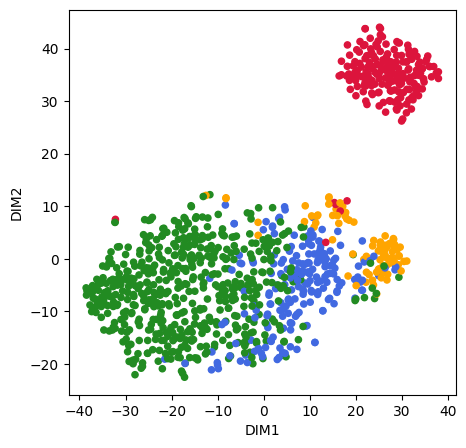

In [ ]:
X_tsne.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), color=y_colors)

In [ ]:
# La divergence de Kullback-Leibler après optimisation
tsne.kl_divergence_

1.2208331823349

# Visualiser les données avec la méthode UMAP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: xlabel='DIM1', ylabel='DIM2'>

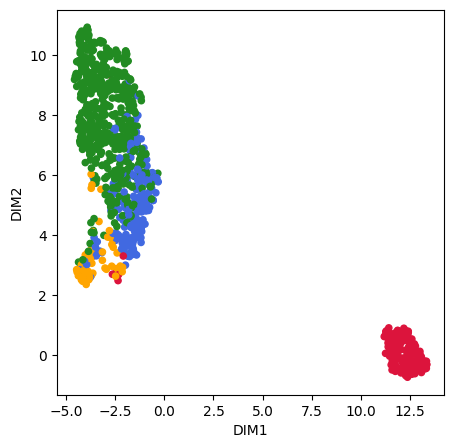

In [ ]:
!pip install umap-learn

import umap
embedding = umap.UMAP(n_components=2, random_state=0, n_jobs=-1)
X_umap = embedding.fit_transform(X_scaled)
columns = ['DIM' + str(c) for c in range(1, X_umap.shape[1]+1, 1)]
X_umap = pd.DataFrame(X_umap, index=X.index, columns=columns)

X_umap.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), color=y_colors)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


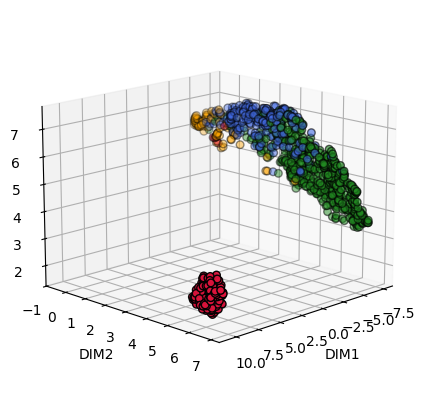

In [ ]:
#3d
embedding = umap.UMAP(n_components=3, random_state=0, n_jobs=-1)
X_umap = embedding.fit_transform(X_scaled)
columns = ['DIM' + str(c) for c in range(1, X_umap.shape[1]+1, 1)]
X_umap = pd.DataFrame(X_umap, index=X.index, columns=columns)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_umap['DIM1'], X_umap['DIM2'], X_umap['DIM3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=45)


# Classification Ascendante Hiérarchique (CAH)

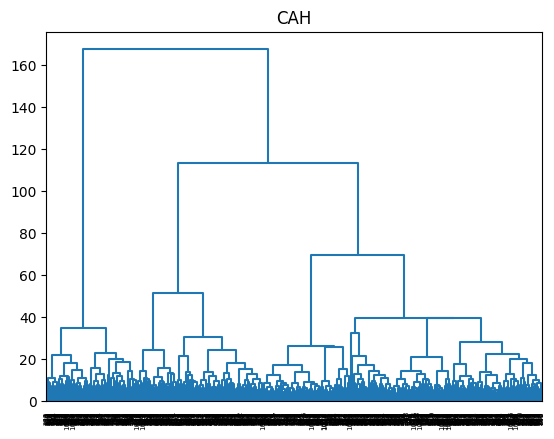

In [ ]:
# librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cancer_cr = ss.fit_transform(df_cleaned)

# générer la matrice des liens
Z = linkage(cancer_cr,method='ward', metric='euclidean')

Z.shape
#affichage du dendogramme
plt.title("CAH")
dendrogram(Z, color_threshold=0)
plt.show()

In [ ]:
Z.shape

(1015, 4)

In [ ]:
df.index

Index(['TCGA-3C-AAAU-01A', 'TCGA-3C-AALI-01A', 'TCGA-3C-AALJ-01A',
       'TCGA-3C-AALK-01A', 'TCGA-4H-AAAK-01A', 'TCGA-5L-AAT0-01A',
       'TCGA-5T-A9QA-01A', 'TCGA-A1-A0SD-01A', 'TCGA-A1-A0SE-01A',
       'TCGA-A1-A0SF-01A',
       ...
       'TCGA-UL-AAZ6-01A', 'TCGA-UU-A93S-01A', 'TCGA-V7-A7HQ-01A',
       'TCGA-W8-A86G-01A', 'TCGA-WT-AB41-01A', 'TCGA-WT-AB44-01A',
       'TCGA-XX-A899-01A', 'TCGA-XX-A89A-01A', 'TCGA-Z7-A8R5-01A',
       'TCGA-Z7-A8R6-01A'],
      dtype='object', name='id_sample', length=1016)

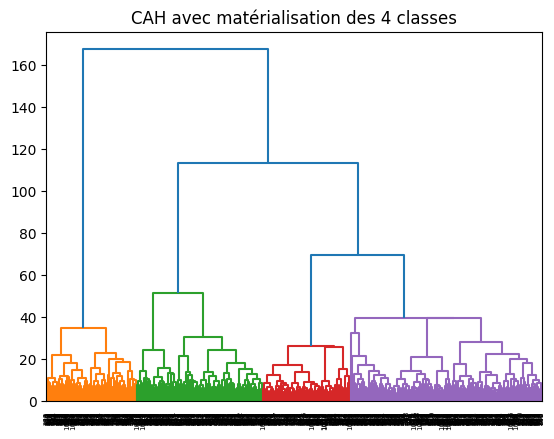

In [ ]:
# matérialisation des 4 classes (hauteur t=55)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, orientation='top', color_threshold=55)
plt.show()

In [ ]:
#Découpage à la hauteur t=7 ==> identification de 4 groupes obtenus
from scipy.cluster.hierarchy import fcluster
groupes_cah = fcluster(Z, t=55, criterion='distance')
#print(groupes_cah)

#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)

#Affichage des observations et leurs groupes
import pandas
print(pandas.DataFrame(df_cleaned.index[idg],groupes_cah[idg]))

           id_sample
1   TCGA-AR-A0U0-01A
1   TCGA-A8-A07U-01A
1   TCGA-BH-A0E6-01A
1   TCGA-BH-A0E0-01A
1   TCGA-E2-A1LG-01A
..               ...
4   TCGA-B6-A1KC-01B
4   TCGA-B6-A1KI-01A
4   TCGA-B6-A2IU-01A
4   TCGA-B6-A0WW-01A
4   TCGA-BH-A0DH-01A

[1016 rows x 1 columns]


# Méthodes des centres mobiles : K-means

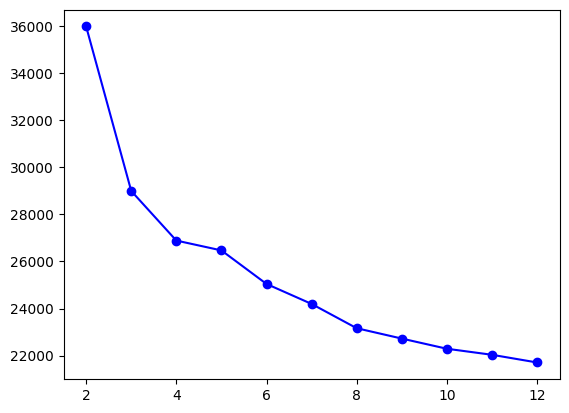

In [ ]:
#Méthode de l'Inertie (Elbow Method)
from sklearn import cluster
max_k = 12

inertia= []
k_values = range(2, max_k +1)

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k,random_state=42, max_iter=100)
    kmeans.fit(cancer_cr)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')

[0.32825137 0.22196555 0.16368136 0.15267411 0.1252846  0.11993986
 0.10281655 0.09220613 0.08871015]


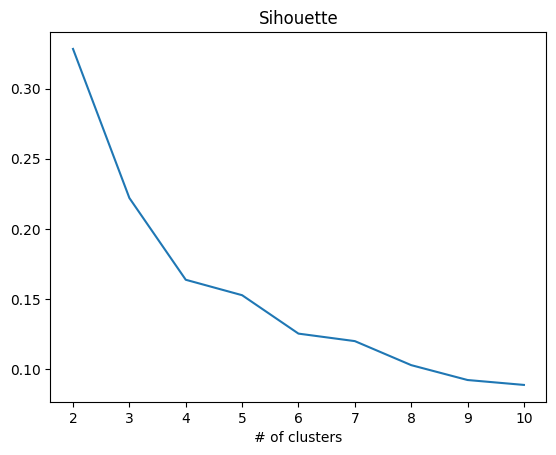

In [ ]:
#Méthode de la Silhouette
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res= np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(cancer_cr)
    res[k] = metrics.silhouette_score(cancer_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Sihouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [ ]:
#K-means sur les données centrées et réduites
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(cancer_cr)

#index triés des groupes
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes
print(pandas.DataFrame(df.index[idk],kmeans.labels_[idk]))



           id_sample
0   TCGA-3C-AAAU-01A
0   TCGA-BH-A0H7-01A
0   TCGA-BH-A0H0-01A
0   TCGA-BH-A0GY-01A
0   TCGA-BH-A0E2-01A
..               ...
3   TCGA-AR-A250-01A
3   TCGA-A8-A097-01A
3   TCGA-AR-A24U-01A
3   TCGA-E2-A152-01A
3   TCGA-C8-A138-01A

[1016 rows x 1 columns]


In [ ]:
#K-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels= kmeans.fit_predict(cancer_cr)

cluster_labels

array([1, 0, 0, ..., 2, 2, 0], dtype=int32)

In [ ]:
df_cleaned["cluster"]=cluster_labels

df_cleaned

,NAT1,BIRC5,BAG1,BCL2,BLVRA,CCNB1,CCNE1,CDC6,CDC20,CDH3,...,GPR160,UBE2T,CXXC5,ANLN,CEP55,ACTR3B,MLPH,NUF2,TMEM45B,cluster
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01A,7.100449,3.361004,3.972581,4.145669,4.765233,4.788987,2.164814,2.633598,4.131205,0.133455,...,4.150233,4.106918,5.528618,3.073409,2.669860,1.928460,5.567999,2.536764,0.213597,1
TCGA-3C-AALI-01A,3.453640,4.501040,2.720929,1.493020,5.823480,5.281003,2.535437,2.734157,4.176553,0.110023,...,5.561226,5.648057,4.711309,3.881110,3.357553,1.168684,7.064176,3.124620,3.946538,0
TCGA-3C-AALJ-01A,4.455574,4.164643,3.911511,4.191457,5.987255,5.229446,2.267963,3.379961,4.592752,0.236786,...,2.859309,5.213461,6.152875,2.697093,2.599436,1.177678,5.222420,3.053335,0.281303,0
TCGA-3C-AALK-01A,4.297961,3.920234,3.688335,3.894904,5.211594,4.014641,0.951107,1.472950,3.806552,0.062392,...,3.063807,4.166154,5.612184,2.645664,2.448027,1.026535,6.225590,1.717959,3.289543,1
TCGA-4H-AAAK-01A,1.695378,2.950846,4.110014,3.572843,4.317856,3.772768,1.103958,2.338953,3.473484,0.098773,...,3.289418,3.437585,4.299617,2.068516,2.152652,1.513181,5.485277,1.537125,2.976903,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44-01A,5.671559,0.847448,3.916222,0.948390,5.684741,2.118711,0.405944,0.376059,1.052003,0.020518,...,3.858187,2.396102,4.128187,0.602403,0.437931,1.760423,7.813294,0.558978,2.999463,2
TCGA-XX-A899-01A,2.438489,2.321316,3.718510,3.184184,4.974851,3.630507,0.916680,1.539649,3.253698,0.052845,...,3.392004,3.396344,4.495407,2.880922,2.236528,1.273338,6.016147,1.436269,2.678045,2
TCGA-XX-A89A-01A,4.502233,2.355003,3.214526,2.676336,5.461672,3.678906,0.815924,1.215013,5.266403,0.095335,...,3.653988,3.225219,4.313055,1.466459,2.244060,1.171581,5.595746,1.363768,1.103595,2


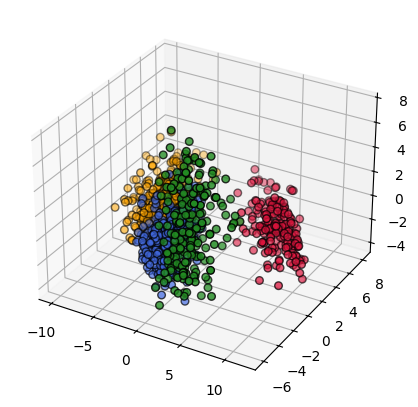

In [ ]:
cluster_colors = {0: 'forestgreen', 1: 'royalblue', 2: 'orange', 3: 'crimson'}
y_colors = [cluster_colors[yi] for yi in cluster_labels]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)

# DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

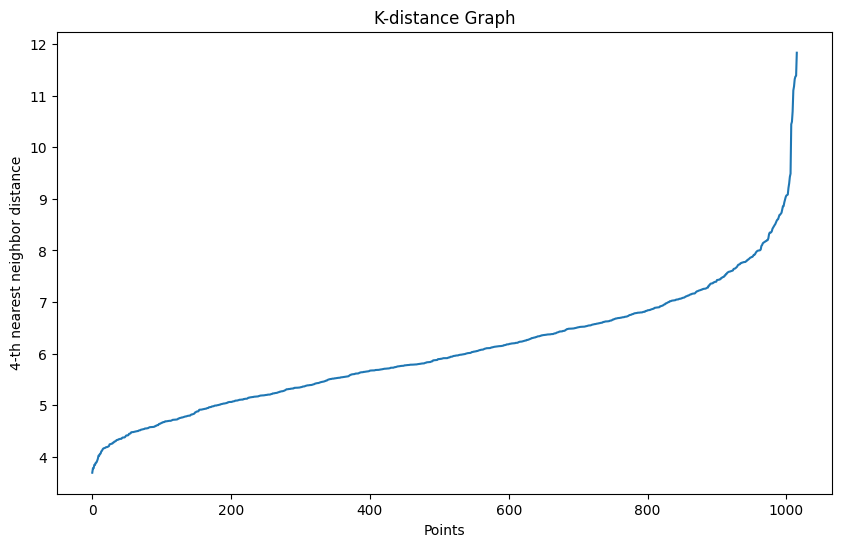

In [ ]:
# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X, k=4)

In [ ]:
# Perform DBSCAN clustering
epsilon = 5 # Chosen based on k-distance graph
min_samples = 5  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

In [ ]:
dbscan.labels_

array([ 1, -1, -1, ...,  0, -1, -1])

In [ ]:
# Print number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 3
Number of noise points: 757


# model prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Séparer les variables indépendantes et la variable cible
X = df.drop('pam50', axis=1)  # Remplacez 'pam50' par le nom de votre colonne cible
y = df['pam50']



<Axes: ylabel='count'>

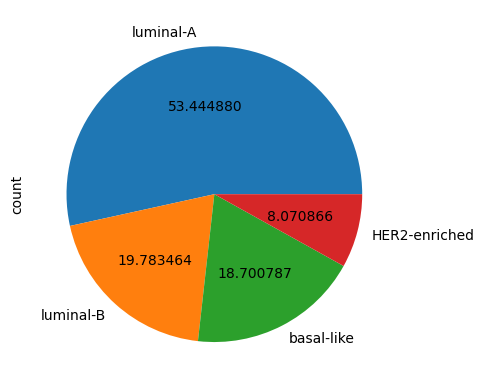

In [ ]:

#imbalanced data
y.value_counts()

y.value_counts().plot.pie(autopct='%2f')

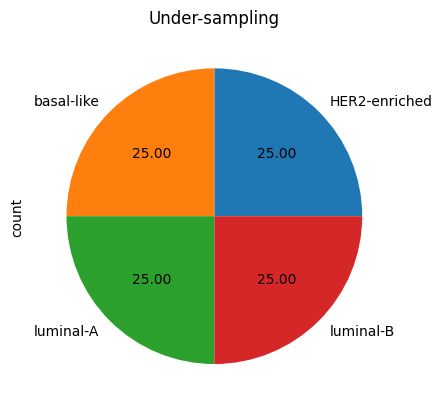

In [ ]:
#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
# Class distribution
y_res.value_counts()

,count
pam50,
HER2-enriched,82
basal-like,82
luminal-A,82
luminal-B,82


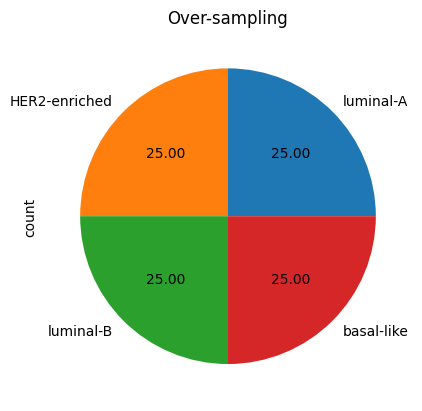

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
y_res.value_counts()

,count
pam50,
luminal-A,543
HER2-enriched,543
luminal-B,543
basal-like,543


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# Définir les classifieurs
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

# Boucle pour entraîner et évaluer chaque classifieur
for name, clf in classifier.items():
    print(f"\n========== {name} ===========")

    # Entraîner le modèle
    clf.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = clf.predict(X_test)

    # Calculer les métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Utiliser 'weighted' pour multiclasse
    recall = recall_score(y_test, y_pred, average='weighted')        # Utiliser 'weighted' pour multiclasse
    f1 = f1_score(y_test, y_pred, average='weighted')                # Utiliser 'weighted' pour multiclasse

    # Afficher les résultats
    print(f"\n Accuracy: {accuracy}")
    print(f"\n Precision: {precision}")
    print(f"\n Recall: {recall}")
    print(f"\n F1 Score: {f1}")


========== Logistic Regression ===========

 Accuracy: 0.9558823529411765

 Precision: 0.9563404801172805

 Recall: 0.9558823529411765

 F1 Score: 0.955944783573807

========== Decision Tree Classifier ===========

 Accuracy: 0.8431372549019608

 Precision: 0.8450678310539903

 Recall: 0.8431372549019608

 F1 Score: 0.8438011014348868

========== Random Forest Classifier ===========


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy: 0.9019607843137255

 Precision: 0.9019901678702172

 Recall: 0.9019607843137255

 F1 Score: 0.8992832293600957
